# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [2]:
# your code here
a = np.random.normal(loc = 50, scale = 5 , size = 10)
# generate a list of random numbers

In [3]:
a = pd.DataFrame(a)

In [4]:
b = np.random.normal(loc = 50, scale = 5 , size = 50)

In [5]:
b = pd.DataFrame(b)

In [6]:
c = np.random.normal(loc = 50, scale = 5 , size = 500)

In [7]:
c = pd.DataFrame(c)

In [8]:
d = np.random.normal(loc = 50, scale = 5 , size = 5000)

In [9]:
d = pd.DataFrame(d)

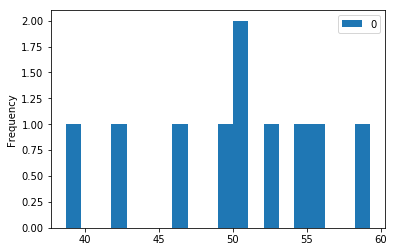

In [10]:
a.plot.hist(bins=20)
plt.show()

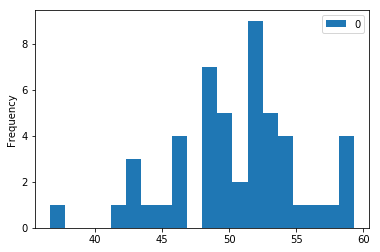

In [11]:
b.plot.hist(bins= 20)
plt.show()

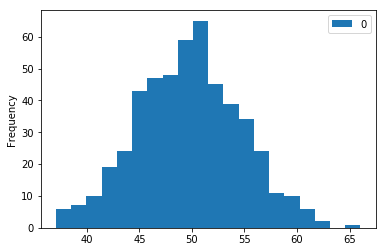

In [12]:
c.plot.hist(bins=20)
plt.show()

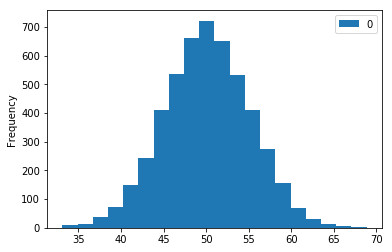

In [13]:
d.plot.hist(bins=20)
plt.show()

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [14]:
"""
The sampling distribution of the sample means approaches a normal distribution as the sample size gets larger.

"""

'\nThe sampling distribution of the sample means approaches a normal distribution as the sample size gets larger.\n\n'

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

In [15]:
# your code here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [16]:
# your code here

from scipy.stats import binom, poisson

In [17]:
binom.pmf(7, n = 20, p = 0.5) # prob de q salga 7 veces x en 20 tiradas de dado

0.07392883300781268

In [18]:
dist = binom(n = 5, p = 0.15) #prob de 0.15 y tamaño de la sample: 5

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

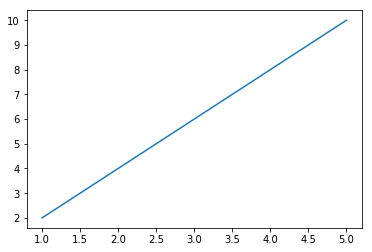

In [19]:
plt.plot([1,2,3,4,5], [2,4,6,8,10]) #ej para ver que necesita listas
plt.show()

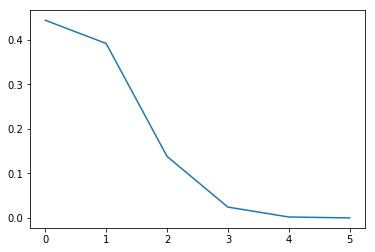

In [20]:
# run this code

n = 6
x = range(n)

fig, ax = plt.subplots(1, 1) #esto es para que nos cree un plot vacio

plt.plot(x, dist.pmf(x)) # para que al plot le ponga una lista del 1 al 5 (range6) , prob de que salga ese número si la media es x

plt.show()

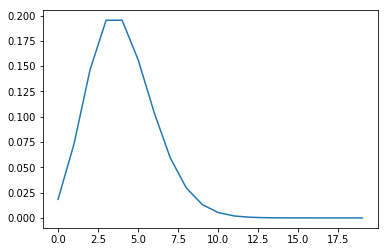

In [21]:
i = range(20)

plt.plot(i, poisson.pmf(i, 4)) # prob de que salga otro numero (siendo el número cada vez, un número en un rango del 1 al 19,
#si la media es cuatro.
plt.show()

In [22]:
poisson.pmf(20, 4)

8.2774636465536562e-09

#### Step 3: Explain what you observe from the plot above.

In [23]:
"""
your comments here
"""

'\nyour comments here\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

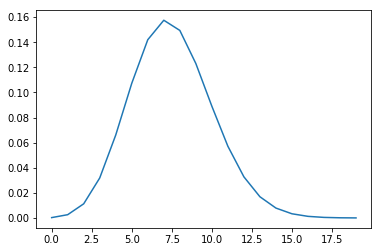

In [24]:
# your code here

dist1 = binom(n = 50, p = 0.15)
dist2 = binom(n = 500, p = 0.15)
dist3 = binom(n = 5000, p = 0.15)

n = 20
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist1.pmf(x))

plt.show()

#prob de que salga cada número (en un ranfo del 1 al 20) 

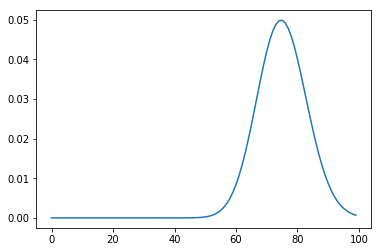

In [25]:
n = 100
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist2.pmf(x))

plt.show()

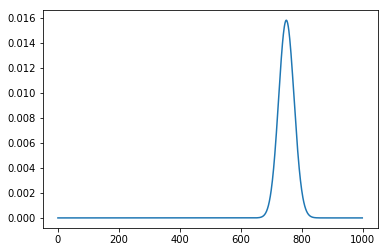

In [26]:
n = 1000
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist3.pmf(x))

plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [27]:
"""
your comments here
"""

'\nyour comments here\n'

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [28]:
"""
expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.["""

'\nexpresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.['

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [41]:
# your code here
from scipy.stats import poisson, norm
import math

poisson.pmf(320, 300)

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [34]:
# your code here

poisson.pmf(60, 300)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [36]:
n = 1001
x = range(n)


arr = poisson.pmf(x, 300)

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

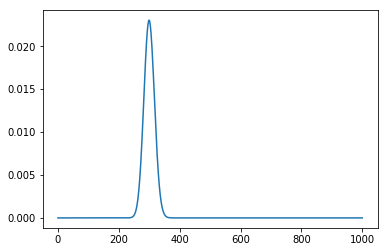

In [37]:
# run this code

plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [59]:
# your code here

#pdf= prob en un punto 
# cdf = suma de las prob de x valor o menos

# x = 35 mins/package
# std = 8 mins

# loc = media
# scale = std / raiz cuadrada de la n
import math
x = range(30,36)
aa=  norm.cdf(35, loc = 35, scale = 8/math.sqrt(200)) - norm.cdf(30, loc = 35, scale = 8/math.sqrt(200))

In [60]:
aa

0.5

In [52]:
norm.cdf(35, loc = 35, scale = 8)

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [63]:
# your code here
(115 * 60)/200 # pasamos las horas a minutos y dividimos por el numero de paquetes, para saber cuantos mins por paquete
 # queremos saber pro de que deliver 200 paquetes takes more than 115 horas
# para eso usaremos 1 - cdf (pq cdf es la suma de las prob de que tarde )(115 * 60)/200 por paqute o menos

34.5

In [65]:
m = norm.cdf(34.5, loc = 35, scale = 8/math.sqrt(200)) # cada paquete= 34.5 mins, media 35 mins, std = 8/ raiz cuadrada de 200

In [66]:
1 - m

0.81162044109420894

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [68]:
# your code here

1 - norm.cdf(300, loc = 200, scale = 40)

0.0062096653257761592

In [70]:
#ni caso a esto, esta bien pero mejor usar la formula de arriba:

# we need to look in table z prob (on internet) for the number that equals to Z and gives us another number:

stand = 0.9938

In [71]:
morethan300 = 1 - 0.9938

In [72]:
morethan300

0.006199999999999983

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [74]:
# your code here

norm.cdf(200, loc = 200, scale = 40) - norm.cdf(160, loc = 200, scale = 40)

0.34134474606854293

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [82]:
# your code here

norm.cdf(150, loc = 200, scale = 40)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [86]:
# your code here
1 - norm.cdf(3000, loc = 200, scale = 40)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [87]:
# your code here
# mean number = 4

poisson.cdf(0, 4)

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [89]:
# your code here
poisson.cdf(1, 4) + poisson.cdf(0, 4)

0.10989383333240507

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [91]:
# your code here
poisson.cdf(6, 4) - poisson.cdf(2, 4)

0.65122271604388193

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [93]:
# your code here
1 - poisson.cdf(2, 2)

0.3233235838169366